In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dataset = pd.read_csv('resources/new_mobile.csv', sep=',')

In [3]:
dataset.shape

(4291, 12)

In [4]:
dataset.dtypes

Id                                         int64
Код                                        int64
Возраст                                    int64
Среднемесячный расход                    float64
Средняя продолжительность разговоров     float64
Звонков днем за месяц                      int64
Звонков вечером за месяц                   int64
Звонков ночью за месяц                     int64
Звонки в другие города                     int64
Звонки в другие страны                     int64
Доля звонков на стационарные телефоны      int64
Количество SMS за месяц                    int64
dtype: object

In [5]:
X = dataset.drop(columns=['Код', 'Среднемесячный расход', 'Id'])
y = dataset['Среднемесячный расход']
X

,Возраст,Средняя продолжительность разговоров,Звонков днем за месяц,Звонков вечером за месяц,Звонков ночью за месяц,Звонки в другие города,Звонки в другие страны,Доля звонков на стационарные телефоны,Количество SMS за месяц
0,24,2.4,12,65,5,0,0,5,56
1,51,1.7,111,109,1,44,0,6,1
2,41,2.1,41,27,0,0,0,1,36
3,35,5.6,47,49,0,0,0,11,23
4,26,4.8,58,77,4,0,0,16,29
...,...,...,...,...,...,...,...,...,...
4286,40,3.7,36,28,2,6,0,12,30
4287,40,6.0,46,66,0,6,0,15,23
4288,60,3.5,58,129,2,4,0,19,5
4289,38,9.3,50,74,0,0,0,28,69


<Axes: >

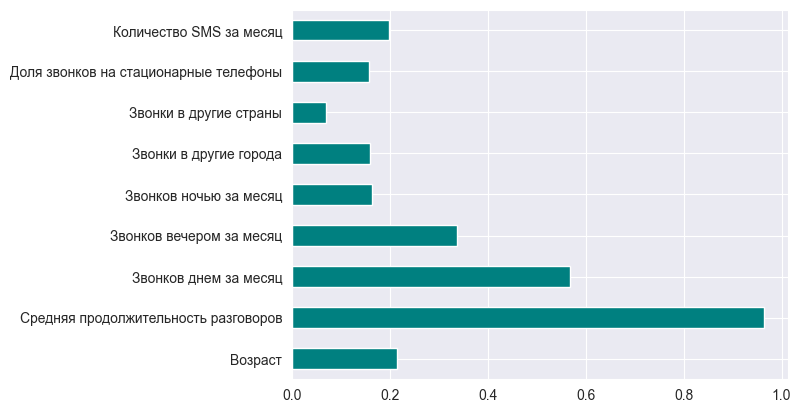

In [6]:
# берем mutual_info_regression, потому что мы решаем задачу регерссии
# метод фильтрации
from sklearn.feature_selection import mutual_info_regression

importance = mutual_info_regression(X, y)
feature_importance = pd.Series(importance, X.columns)
feature_importance.plot(kind='barh', color='teal')

In [7]:
feature_importance.sort_values(ascending=False)

Средняя продолжительность разговоров     0.964712
Звонков днем за месяц                    0.567866
Звонков вечером за месяц                 0.337595
Возраст                                  0.215685
Количество SMS за месяц                  0.199181
Звонков ночью за месяц                   0.163901
Звонки в другие города                   0.159800
Доля звонков на стационарные телефоны    0.156766
Звонки в другие страны                   0.070228
dtype: float64

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [12]:
# рекурсивное исключение признаков (прямой метод)
# SVR - это SVM для регрессии
from sklearn.svm import SVR
from sklearn.feature_selection import RFE

threshold = 5 # the number of most relevant features

lr = SVR(kernel="linear")

rfe = RFE(lr, n_features_to_select=5)
result=rfe.fit(X, y)
# X_train, y_train - входные и выходные данные с обучающей выборки соответственно.
print(type(result))
selector_ind = result.get_support()
df_rfe = X.iloc[:, selector_ind]
print(df_rfe.columns)

<class 'sklearn.feature_selection._rfe.RFE'>
Index(['Средняя продолжительность разговоров', 'Звонков днем за месяц',
       'Звонков вечером за месяц', 'Звонков ночью за месяц',
       'Звонки в другие страны'],
      dtype='object')
